## Introduction

This is the second in a series of lessons related to astronomy data.

As a continuing example, we will replicate part of the analysis in a recent paper, "[Off the beaten path: Gaia reveals GD-1 stars outside of the main stream](https://arxiv.org/abs/1805.00425)" by Adrian M. Price-Whelan and Ana Bonaca.

In the first lesson we wrote an ADQL query to collect data from the Gaia database for stars in the known vicinity of GD-1.

In this lesson, we'll continue the analysis, selecting stars whose proper motion is consistent with being in GD-1.

In [10]:
# If we're running on Colab, install libraries

import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    !pip install astroquery astro-gala pyia

In [11]:
import os

filename = 'gd1_results4.fits'

if not os.path.exists(filename):
    !wget https://github.com/datacarpentry/astronomy-python/raw/gh-pages/data/gd1_results4.fits

## Reload the data

In the previous notebook, we ran a query on the Gaia server and downloaded data for roughly 100,000 stars.  We saved the data in a FITS file so that now, picking up where we left off, we can read the data from a local file rather than running the query again.

Here's how we read it back.

In [12]:
from astropy.table import Table

results4 = Table.read(filename)

The result is an Astropy `Table`.

We can use `info` to refresh our memory of the contents.

In [13]:
results4.info

<Table length=140340>
      name       dtype    unit                              description                            
--------------- ------- -------- ------------------------------------------------------------------
      source_id   int64          Unique source identifier (unique within a particular Data Release)
             ra float64      deg                                                    Right ascension
            dec float64      deg                                                        Declination
           pmra float64 mas / yr                         Proper motion in right ascension direction
          pmdec float64 mas / yr                             Proper motion in declination direction
       parallax float64      mas                                                           Parallax
 parallax_error float64      mas                                         Standard error of parallax
radial_velocity float64   km / s                                              

## Selecting rows and columns

In this section we'll see operations for selecting columns and rows from an Astropy `Table`.  You can find more information about these operations in the [Astropy documentation](https://docs.astropy.org/en/stable/table/access_table.html).

We can get the names of the columns like this:

In [14]:
results4.colnames

['source_id',
 'ra',
 'dec',
 'pmra',
 'pmdec',
 'parallax',
 'parallax_error',
 'radial_velocity']

And select an individual column like this:

In [15]:
results4['ra']

142.48301935991023
142.25452941346344
142.64528557468074
142.57739430926034
142.58913564478618
141.81762228999614
143.18339801317677
142.9347319464589
142.26769745823267
142.89551292869012
142.2780935768316


The result is a `Column` object that contains the data, and also the data type, units, and name of the column.

In [16]:
type(results4['ra'])

astropy.table.column.Column

The rows in the `Table` are numbered from 0 to `n-1`, where `n` is the number of rows.  We can select the first row like this:

In [17]:
results4[0]

source_id,ra,dec,pmra,pmdec,parallax,parallax_error,radial_velocity
,deg,deg,mas / yr,mas / yr,mas,mas,km / s
int64,float64,float64,float64,float64,float64,float64,float64
637987125186749568,142.48301935991023,21.75771616932985,-2.5168384683875766,2.941813096629439,-0.2573448962333354,0.823720794509811,1e+20


As you might have guessed, the result is a `Row` object.

In [18]:
type(results4[0])

astropy.table.row.Row

Notice that the bracket operator selects both columns and rows.  You might wonder how it knows which to select.

If the expression in brackets is a string, it selects a column; if the expression is an integer, it selects a row.

If you apply the bracket operator twice, you can select a column and then an element from the column.

In [19]:
results4['ra'][0]

142.48301935991023

Or you can select a row and then an element from the row.

In [20]:
results4[0]['ra']

142.48301935991023

You get the same result either way.

## Scatter plot

To see what the results look like, we'll use a scatter plot.  The library we'll use is [Matplotlib](https://matplotlib.org/), which is the most widely-used plotting library for Python.

The Matplotlib interface is based on MATLAB (hence the name), so if you know MATLAB, some of it will be familiar.

We'll import like this.

In [21]:
import matplotlib.pyplot as plt

Pyplot part of the Matplotlib library.  It is conventional to import it using the shortened name `plt`.

Pyplot provides two functions that can make scatterplots:

* [plt.scatter](https://matplotlib.org/3.3.0/api/_as_gen/matplotlib.pyplot.scatter.html), and

* [plt.plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html)

`scatter` is more versatile; for example, you can make every point in a scatter plot a different color.

`plot` is more limited, but for simple cases, it can be substantially faster.  

Jake Vanderplas explains these differences in [The Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/04.02-simple-scatter-plots.html)

Since we are plotting more than 100,000 points and they are all the same size and color, we'll use `plot`.

Here's a scatter plot with right ascension on the x-axis and declination on the y-axis, both ICRS coordinates in degrees.

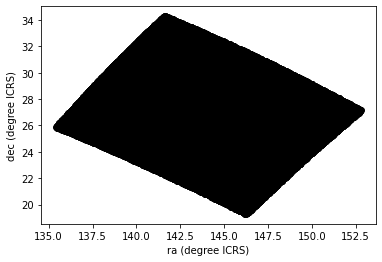

In [22]:
x = results4['ra']
y = results4['dec']
plt.plot(x, y, 'ko')

plt.xlabel('ra (degree ICRS)')
plt.ylabel('dec (degree ICRS)');

The arguments to `plt.plot` are `x`, `y`, and a string that specifies the style.  In this case, the letters `ko` indicate that we want a black, round marker (`k` is for black because `b` is for blue).

The functions `xlabel` and `ylabel` put labels on the axes.

This scatter plot has a problem.  It is "[overplotted](https://python-graph-gallery.com/134-how-to-avoid-overplotting-with-python/)", which means that there are so many overlapping points, we can't distinguish between high and low density areas.

To fix this, we can provide optional arguments to control the size and transparency of the points.

**Exercise:** In the call to `plt.plot`, add the keyword argument `markersize=0.1` to make the markers smaller.

Then add the argument `alpha=0.1` to make the markers nearly transparent.

Adjust these arguments until you think the figure shows the data most clearly.

Note: Once you have made these changes, you might notice that the figure shows stripes with lower density of stars.  These stripes are caused by...

TODO: what are they caused by?

## Transform back

Remember that we selected data from a rectangle of coordinates in the `GD1Koposov10` frame, then transformed them to ICRS when we constructed the query.
So the coordinates in `results4` are in ICRS.

To plot them, we will transform them back to the `GD1Koposov10` frame; that way, the axes of the figure are aligned with the GD-1, which will make it easy to select stars near the centerline of the stream.

To do that, we'll put the results into a `GaiaData` object, provided by the [pyia library](https://pyia.readthedocs.io/en/latest/api/pyia.GaiaData.html).

In [23]:
from pyia import GaiaData

gaia_data4 = GaiaData(results4)
type(gaia_data4)

pyia.data.GaiaData

From the `GaiaData` object we can get sky coordinates like this.

In [24]:
import astropy.units as u

skycoord4 = gaia_data4.get_skycoord(
                distance=8*u.kpc, 
                radial_velocity=0*u.km/u.s)
type(skycoord4)

astropy.coordinates.sky_coordinate.SkyCoord

We have to provide `distance` and `radial_velocity` because...

TODO: why do we have to provide these?  They seem kinda arbitrary.   Maybe we should be doing this instead:

```
distance=g.get_distance(min_parallax=1e-3*u.mas,
                        parallax_fill_value=1e-5*u.mas)
radial_velocity=g.get_radial_velocity(fill_value=1e8*u.km/u.s)
c = g.get_skycoord(distance=distance, radial_velocity=radial_velocity)
```

In [25]:
# alternative

distance = gaia_data4.get_distance(min_parallax=1e-3*u.mas,
                        parallax_fill_value=1e-5*u.mas)
distance

<Distance [1.00000000e+08, 2.36558539e+03, 9.64881011e+03, ...,
           8.61768705e+03, 1.70849584e+03, 1.04578649e+03] pc>

In [26]:
# alternative

radial_velocity = gaia_data4.get_radial_velocity(fill_value=1e8*u.km/u.s)

The result is an Astropy `SkyCoord` object ([documentation here](https://docs.astropy.org/en/stable/api/astropy.coordinates.SkyCoord.html#astropy.coordinates.SkyCoord)), which is useful because it provides `transform_to`, so we can transform the coordinates to other frames.

In [27]:
import gala.coordinates as gc

transformed = skycoord4.transform_to(gc.GD1Koposov10)

Finally, we'll use `reflex_correct` from Gala ([documentation here](https://gala-astro.readthedocs.io/en/latest/api/gala.coordinates.reflex_correct.html)) to correct for solar reflex motion.

TODO: Can we explain what that is?

In [28]:
gd1_coord4 = gc.reflex_correct(transformed)

type(gd1_coord4)

astropy.coordinates.sky_coordinate.SkyCoord

The result is a `SkyCoord` object that contains the transformed coordinates as attributes named `phi1` and `phi2`, which represent right ascension and declination in the `GD1Koposov10` frame.

We can select them like this:

In [29]:
phi1 = gd1_coord4.phi1
phi2 = gd1_coord4.phi2

And plot them like this:

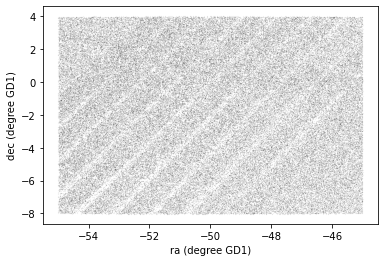

In [30]:
plt.plot(phi1, phi2, 'ko', markersize=0.1, alpha=0.2)

plt.xlabel('ra (degree GD1)')
plt.ylabel('dec (degree GD1)');

## Pandas DataFrame

At this point we have three objects containing different subsets of the data.

In [31]:
type(results4)

astropy.table.table.Table

In [32]:
type(gaia_data4)

pyia.data.GaiaData

In [33]:
type(gd1_coord4)

astropy.coordinates.sky_coordinate.SkyCoord

On one hand, this makes sense, since each object provides different capabilities.  But working with three different object types can be awkward.

We should choose one object and get all of the data into it.  We'll use a Pandas DataFrame, for two reasons:

1. It provides capabilities that are pretty much a superset of the other data structures, so it's the all-in-one solution.

2. Pandas is a general-purpose tool that is useful in many domains, especially data science.  If you are going to develop expertise in one tool, Pandas is a good choice.

However, compared to an Astropy `Table`, Pandas has one big drawback: it does not keep the metadata associated with the table, including the units for the columns.

But it's easy to convert a `Table` to a Pandas `DataFrame`.

In [34]:
import pandas as pd

df4 = results4.to_pandas()
df4.shape

(140340, 8)

`DataFrame` provides `head`, which displays the first few rows.  It is useful for spot-checking large results as you go along.

In [35]:
df4.head()

,source_id,ra,dec,pmra,pmdec,parallax,parallax_error,radial_velocity
0,637987125186749568,142.483019,21.757716,-2.516838,2.941813,-0.257345,0.823721,1.000000e+20
1,638285195917112960,142.254529,22.476168,2.662702,-12.165984,0.422728,0.297472,1.000000e+20
2,638073505568978688,142.645286,22.166932,18.306747,-7.950660,0.103640,0.544584,1.000000e+20
3,638086386175786752,142.577394,22.227920,0.987786,-2.584105,-0.857327,1.059607,1.000000e+20
4,638049655615392384,142.589136,22.110783,0.244439,-4.941079,0.099625,0.486224,1.000000e+20


Now we can extract the columns we want from `gd1_coord4` and add them as columns in the DataFrame.  `phi1` and `phi2` contain the transformed coordinates.

In [36]:
df4['phi1'] = gd1_coord4.phi1
df4['phi2'] = gd1_coord4.phi2
df4.shape

(140340, 10)

`pm_phi1_cosphi2` and `pm_phi2` contain the components of proper motion in the transformed frame.

In [37]:
df4['pm_phi1'] = gd1_coord4.pm_phi1_cosphi2
df4['pm_phi2'] = gd1_coord4.pm_phi2
df4.shape

(140340, 12)

**Detail:** If you notice that `SkyCoord` has an attribute called `proper_motion`, you might wonder why we are not using it.

We could have: `proper_motion` contains the same data as `pm_phi1_cosphi2` and `pm_phi2` in a different format, as the following cell confirms.

In [38]:
# Detail

import numpy as np

pm_phi1, pm_phi2 = gd1_coord4.proper_motion
assert np.all(pm_phi1 == gd1_coord4.pm_phi1_cosphi2)
assert np.all(pm_phi2 == gd1_coord4.pm_phi2)

## Plot proper motion

Now we are ready to replicate one of the plots in Figure 1 of the Price-Whelan and Bonaca paper, the one that shows the components of proper motion as a scatter plot:

<img width="300" src="https://github.com/datacarpentry/astronomy-python/raw/gh-pages/fig/gd1-1.png">

In this figure, the shaded area is a high-density region of stars with the proper motion we expect for stars in GD-1.  After replicating this figure, we will select stars in this region as GD-1 candidates.

Following the analysis in the paper, we'll start by selecting stars near the centerline of GD-1.

As we saw in the previous figure, many stars in GD-1 are less than 1 degree of declination from the line `phi2=0`.

<img src="https://github.com/datacarpentry/astronomy-python/raw/gh-pages/fig/gd1-4.png">

If we select stars near this line, they are more likely to be in GD-1.

We'll start by selecting the `phi2` column from the `DataFrame`:

In [39]:
phi2 = df4['phi2']
type(phi2)

pandas.core.series.Series

The result is a `Series`, which is the structure Pandas uses to represent columns.

We can use a comparison operator, `>`, to compare the values in a `Series` to a constant.

In [40]:
phi2_min = -1.0 * u.deg
phi2_max = 1.0 * u.deg

mask = (df4['phi2'] > phi2_min)
type(mask)

pandas.core.series.Series

In [41]:
mask.dtype

dtype('bool')

The result is a `Series` of Boolean values, that is, `True` and `False`. 

In [42]:
mask.head()

0    False
1    False
2    False
3    False
4    False
Name: phi2, dtype: bool

A Boolean `Series` is sometimes called a "mask" because we can use it to mask out some of the rows in a `DataFrame` and select the rest, like this:

In [43]:
selected = df4[mask]
type(selected)

pandas.core.frame.DataFrame

`selected` is a `DataFrame` that contains only the rows from `df4` that correspond to `True` values in `mask`.

The previous mask selects all stars where `phi2` exceeds `phi2_min`, which is not what we want.

The following mask selects stars where `phi2` falls between `phi2_min` and `phi2_max`.

In [44]:
phi2_min = -1.0 * u.deg
phi2_max = 1.0 * u.deg

phi_mask = ((df4['phi2'] > phi2_min) & 
            (df4['phi2'] < phi2_max))

The `&` operator computes "logical AND", which means the result is true where elements from both Boolean `Series` are true.

The sum of a Boolean `Series` is the number of `True` values, so we can use `sum` to see how many stars are in the selected region.

In [45]:
phi_mask.sum()

25084

And we can use `phi1_mask` to select stars near the centerline, which are more likely to be in GD-1.

In [46]:
centerline = df4[phi_mask]
len(centerline)

25084

Here's a scatter plot of proper motion for the selected stars.

In [47]:
pm1 = centerline['pm_phi1']
pm2 = centerline['pm_phi2']

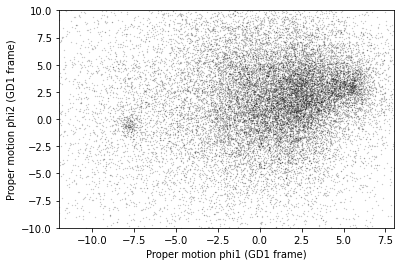

In [48]:
plt.plot(pm1, pm2, 'ko', markersize=0.3, alpha=0.3)
    
plt.xlabel('Proper motion phi1 (GD1 frame)')
plt.ylabel('Proper motion phi2 (GD1 frame)')

plt.xlim(-12, 8)
plt.ylim(-10, 10);

`xlim` and `ylim` set the bounds of the x and y axis, so we can zoom in on stars near (-8, 0), which is the proper motion we expect for stars in GD-1.

TODO: Why do we expect that?  And it is related to the arbitrary choice of velocity when we transformed coordinates?

You might notice that our figure is less dense than the one in the paper.  That's because we're using stars from a relatively small region.  Their figure is based on a region about 10 times bigger.

Soon we'll go back and select stars from a larger region.  But first we'll use the proper motion data to identify stars likely to be in GD-1.

## Filtering based on proper motion

The next step is to select stars in the "overdense" region of proper motion, which are candidates to be in GD-1.

In the original paper, Price-Whelan and Bonaca used a polygon to cover this region, as shown in this figure.

<img width="300" src="https://github.com/datacarpentry/astronomy-python/raw/gh-pages/fig/gd1-1.png">

We'll use a simple rectangle for now, but in a later lesson we'll see how to select a polygonal region as well.

Here are bounds on proper motion we chose by eye,

In [51]:
pm1_min = -8.9
pm1_max = -6.9
pm2_min = -2.2
pm2_max =  1.0

To draw these bounds, we'll make two lists containing the coordinates of the corners of the rectangle.

In [52]:
pm1_rect = [pm1_min, pm1_min, pm1_max, pm1_max] * u.mas/u.yr
pm2_rect = [pm2_min, pm2_max, pm2_max, pm2_min] * u.mas/u.yr

Here's what the plot looks like with the bounds we chose.

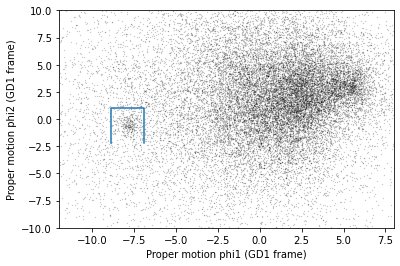

In [53]:
plt.plot(pm1, pm2, 'ko', markersize=0.3, alpha=0.3)
plt.plot(pm1_rect, pm2_rect, '-')
    
plt.xlabel('Proper motion phi1 (GD1 frame)')
plt.ylabel('Proper motion phi2 (GD1 frame)')

plt.xlim(-12, 8)
plt.ylim(-10, 10);

To select rows that fall within these bounds, we'll use the following function, which uses Pandas operators to make a mask that selects rows where `series` falls between `low` and `high`.

In [57]:
def between(series, low, high):
    """Make a Boolean Series.
    
    series: Pandas Series
    low: lower bound
    high: upper bound
    
    returns: Boolean Series
    """
    return (series > low) & (series < high)

The following mask select stars with proper motion in the region we chose.

In [58]:
pm_mask = (between(df4['pm_phi1'], pm1_min, pm1_max) & 
           between(df4['pm_phi2'], pm2_min, pm2_max))

Again, the sum of a Boolean series is the number of `True` values.

In [59]:
pm_mask.sum()

1049

Now we can use this mask to select rows from `df4`.

In [46]:
candidates = df4[pm_mask]
len(candidates)

1049

These are the stars we think are likely to be in GD-1.  Let's see what they look like, plotting their coordinates (not their proper motion).

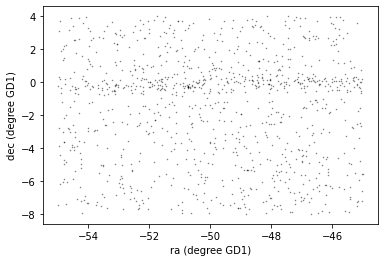

In [47]:
phi1 = candidates['phi1']
phi2 = candidates['phi2']

plt.plot(phi1, phi2, 'ko', markersize=0.5, alpha=0.5)

plt.xlabel('ra (degree GD1)')
plt.ylabel('dec (degree GD1)');

Now that's starting to look like a tidal stream!

## Transforming the rectangle

At this point we have downloaded data for a relatively large number of stars (more than 100,000) and selected a relatively small number (around 1000).

It would be more efficient to use ADQL to select only the stars we need.  That would also make it possible to download data covering a larger region of the sky.

However, the selection we just did was based on proper motion in the `GD1Koposov10` frame.  In order to do the same selection in ADQL, we have to translate these motions into ICRS.

We'll start by creating a `GD1Koposov10` object that contains the corners of the rectangle we just selected in proper motion.

But we also need to specify right ascension and declination.  For those, we'll use a point in the center of the selected region.

In [60]:
phi1 = [-50, -50, -50, -50] * u.deg
phi2 = [2, 2, 2, 2] * u.deg

Now we can put the coordinates and proper motion into the `GD1Koposov10` object.

In [61]:
import gala.coordinates as gc

corners = gc.GD1Koposov10(phi1=phi1, phi2=phi2,
                          pm_phi1_cosphi2=pm1_rect, 
                          pm_phi2=pm2_rect)
corners

<GD1Koposov10 Coordinate: (phi1, phi2) in deg
    [(-50., 2.), (-50., 2.), (-50., 2.), (-50., 2.)]
 (pm_phi1_cosphi2, pm_phi2) in mas / yr
    [(-8.9, -2.2), (-8.9,  1. ), (-6.9,  1. ), (-6.9, -2.2)]>

And translate the the ICRS frame.

In [62]:
import astropy.coordinates as coord

corners_icrs = corners.transform_to(coord.ICRS)
corners_icrs.pm_ra_cosdec

<Quantity [-3.03920854, -5.71548076, -4.61904353, -1.9427713 ] mas / yr>

In [63]:
corners_icrs.pm_dec

<Quantity [-8.64946307, -6.8951635 , -5.22249336, -6.97679293] mas / yr>

To see whether the transform worked as expected, we'll plot the polygon over the proper motions in ICRS, which we can select from `centerline`:

In [ ]:
pmra = centerline['pmra']
pmdec = centerline['pmdec']

Here's the transformed polygon superimposed on a scatter plot of proper motion in the ICRS frame.

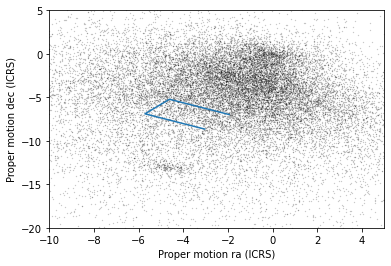

In [65]:
plt.plot(pmra, pmdec, 'ko', markersize=0.3, alpha=0.3)
plt.plot(corners_icrs.pm_ra_cosdec,
         corners_icrs.pm_dec, '-')

plt.xlabel('Proper motion ra (ICRS)')
plt.ylabel('Proper motion dec (ICRS)')

plt.xlim([-10, 5])
plt.ylim([-20, 5]);

The transformed polygon does not contain the region of high density, so it looks like the transformation did not work as expected.

An alternative is to choose a bounding box that is as big as needed to cover the region of high density.  Here are the bounds we chose.

In [67]:
pmra_min = -7 
pmra_max = -2
pmdec_min = -15
pmdec_max = -11

To see what they look like on the plot, we'll make a list of coordinates for the four corners.

In [68]:
pmra_rect = [pmra_min, pmra_min, pmra_max, pmra_max] * u.mas/u.yr
pmdec_rect = [pmdec_min, pmdec_max, pmdec_max, pmdec_min] * u.mas/u.yr

Here's what the rectangle we chose looks like.

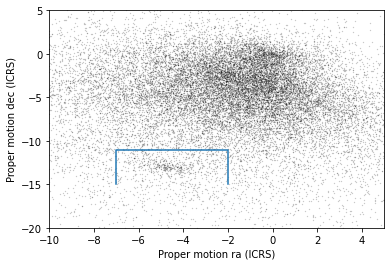

In [69]:
plt.plot(pmra, pmdec, 'ko', markersize=0.3, alpha=0.3)
plt.plot(pmra_rect, pmdec_rect, '-')

plt.xlabel('Proper motion ra (ICRS)')
plt.ylabel('Proper motion dec (ICRS)')

plt.xlim([-10, 5])
plt.ylim([-20, 5]);

To test it, we can make a second mask to select proper motion in the ICRS frame.

In [70]:
pm_mask2 = (between(df4['pmra'], pmra_min, pmra_max) & 
            between(df4['pmdec'], pmdec_min, pmdec_max))

pm_mask2.sum(), pm_mask.sum()

(2957, 1049)

This rectangle contains more stars.

Let's check how much overlap there is between the two masks (that is, the intersection of the two selections).

In [72]:
(pm_mask & pm_mask2).sum()

1042

I looks like almost all of the stars we selected using the GD1 frame are also selected using the ICRS frame.

The advantage of the ICRS frame is that we can use ADQL to do this selection on the Gaia server, rather than downloading a lot of data we don't need.

## Selecting the region

Let's review how we got to this point.

1. We made an ADQL query to the Gaia server to get data for stars in the vicinity of GD-1.

2. We transformed to `GD1` coordinates so we could select stars along the centerline of GD-1.

3. We plotted the proper motion of the centerline stars to identify the bounds of the overdense region.

4. We made a mask that selects stars whose proper motion is in the overdense region.

The problem is that we downloaded data for more than 100,000 stars and selected only about 1000 of them.

It will be more efficient if we select on proper motion as part of the query.  That will allow us to work with a larger region of the sky in a single query, and download less unneeded data.

This query will select on the following conditions:

* `parallax < 1`

* `bp_rp BETWEEN -0.75 AND 2`

* Coordinates within the transformed polygon

* Proper motion with the rectangle we just defined.

The first three conditions are the same as in `query4`.  Only the last one is new.

Now, we have code in the previous notebook than transforms the polygon and constructs an ADQL string.  We could copy it from the previous notebook, but when you find yourself using the same code more than once, you might consider putting it in a function.

For example, here's the code from the previous notebook that takes the boundaries of a rectangle in the GD1 frame and returns the coordinates of the corners tranformed to the ICRS frame.

In [58]:
def transform_rectangle(phi1_min, phi1_max, phi2_min, phi2_max):
    """Transform a rectange in GD1 to a polygon in ICRS.
    
    phi1_min, phi1_max: lower and upper bound of ra
    phi2_min, phi2_max: lower and upper bound of dec
    
    returns: astropy.coordinates.builtin_frames.icrs.ICRS
    """
    phi1_rect = [phi1_min, phi1_min, phi1_max, phi1_max] * u.deg
    phi2_rect = [phi2_min, phi2_max, phi2_max, phi2_min] * u.deg
    corners = gc.GD1Koposov10(phi1=phi1_rect, phi2=phi2_rect)
    corners_icrs = corners.transform_to(coord.ICRS)
    return corners_icrs

We can call it like this:

In [59]:
corners_icrs = transform_rectangle(-70, -20, -5, 5)

**Exercise:** Here's the code we used in a previous notebook to take a list of coordinates and write a string that represents a polygon in ADQL.

In [60]:
point_base = "{point.ra.value}, {point.dec.value}"

t = [point_base.format(point=point)
     for point in corners_icrs]

point_list = ', '.join(t)
point_list

'135.30559858565638, 8.398623940157561, 126.50951508623503, 13.44494195652069, 163.0173655836748, 54.24242734020255, 172.9328536286811, 46.47260492416258'

Wrap this code in a function that takes a list of coordinates, like `corner_icrs`, as a parameter and returns a string like `point_list`.

In [61]:
# Solution

def make_adql_point_list(coords):
    """Make an ADQL string of coordinates.
    
    coords: object that behaves like a list of coordinates
    
    returns: string
    """
    point_base = "{point.ra.value}, {point.dec.value}"

    t = [point_base.format(point=point)
         for point in coords]

    return ', '.join(t)

In [62]:
# Solution

point_list = make_adql_point_list(corners_icrs)
point_list

'135.30559858565638, 8.398623940157561, 126.50951508623503, 13.44494195652069, 163.0173655836748, 54.24242734020255, 172.9328536286811, 46.47260492416258'

## Add WHERE clause for proper motion

Now let's assemble the query.  Here's the base string we used for `query4`:

In [63]:
query4_base = """SELECT 
{columns}
FROM gaiadr2.gaia_source
WHERE parallax < 1
  AND bp_rp BETWEEN -0.75 AND 2 
  AND 1 = CONTAINS(POINT(ra, dec), 
                   POLYGON({point_list}))
"""

**Exercise:** Define a new query base called `query_base5` that starts with `query_base4` and adds new clauses to select `pmra` between `pmra_min` and `pmra_max` and `pmdec` between `pmdec_min` and pmdec_max.

In [64]:
# Solution

query5_base = """SELECT 
{columns}
FROM gaiadr2.gaia_source
WHERE parallax < 1
  AND bp_rp BETWEEN -0.75 AND 2 
  AND 1 = CONTAINS(POINT(ra, dec), 
                   POLYGON({point_list}))
  AND pmra BETWEEN {pmra_min} AND {pmra_max} 
  AND pmdec BETWEEN {pmdec_min} AND {pmdec_max}
"""

Here again are the variables we want to select.

In [65]:
columns = 'source_id, ra, dec, pmra, pmdec, parallax, parallax_error, radial_velocity'

**Exercise:** Use `format` to format `query_base5` and define `query5`, filling in the values of `columns`, `point_list`, and the boundaries of proper motion.

In [66]:
# Solution

query5 = query5_base.format(columns=columns, 
                            point_list=point_list,
                            pmra_min=pmra_min,
                            pmra_max=pmra_max,
                            pmdec_min=pmdec_min,
                            pmdec_max=pmdec_max)
print(query5)

SELECT 
source_id, ra, dec, pmra, pmdec, parallax, parallax_error, radial_velocity
FROM gaiadr2.gaia_source
WHERE parallax < 1
  AND bp_rp BETWEEN -0.75 AND 2 
  AND 1 = CONTAINS(POINT(ra, dec), 
                   POLYGON(135.30559858565638, 8.398623940157561, 126.50951508623503, 13.44494195652069, 163.0173655836748, 54.24242734020255, 172.9328536286811, 46.47260492416258))
  AND pmra BETWEEN -7 AND -2 
  AND pmdec BETWEEN -15 AND -11



Here's how we run it.

In [68]:
from astroquery.gaia import Gaia

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [69]:
job5 = Gaia.launch_job_async(query5)
print(job5)

INFO: Query finished. [astroquery.utils.tap.core]
<Table length=13976>
      name       dtype    unit                              description                             n_bad
--------------- ------- -------- ------------------------------------------------------------------ -----
      source_id   int64          Unique source identifier (unique within a particular Data Release)     0
             ra float64      deg                                                    Right ascension     0
            dec float64      deg                                                        Declination     0
           pmra float64 mas / yr                         Proper motion in right ascension direction     0
          pmdec float64 mas / yr                             Proper motion in declination direction     0
       parallax float64      mas                                                           Parallax     0
 parallax_error float64      mas                                         Standard

And get the results.

In [70]:
results5 = job5.get_results()
len(results5)

13976

In [71]:
filename5 = 'gd1_results5.fits'
results5.write(filename5, overwrite=True)

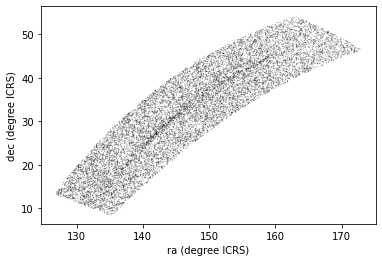

In [75]:
x = results5['ra']
y = results5['dec']
plt.plot(x, y, 'ko', markersize=0.3, alpha=0.3)

plt.xlabel('ra (degree ICRS)')
plt.ylabel('dec (degree ICRS)');

In [76]:
def make_dataframe(table):
    gaia_data = GaiaData(table)

    c_sky = gaia_data.get_skycoord(distance=8*u.kpc, 
                                   radial_velocity=0*u.km/u.s)
    c_gd1 = gc.reflex_correct(
                c_sky.transform_to(gc.GD1Koposov10))

    df = table.to_pandas()
    df['phi1'] = c_gd1.phi1
    df['phi2'] = c_gd1.phi2
    df['pm_phi1'] = c_gd1.pm_phi1_cosphi2
    df['pm_phi2'] = c_gd1.pm_phi2
    return df

In [77]:
df5 = make_dataframe(results5)

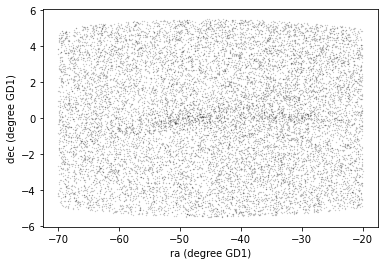

In [79]:
x = df5['phi1']
y = df5['phi2']

plt.plot(x, y, 'ko', markersize=0.3, alpha=0.3)

plt.xlabel('ra (degree GD1)')
plt.ylabel('dec (degree GD1)');